In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 150)

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

root = '/content/drive/MyDrive/instacart-market-basket-analysis/'

In [ ]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [ ]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Data preparation
For Analysis, I am combining order_products_train and order_products_prior as order_products. Based on order_id, product_id, aisle_id and department_id I will merge those data with order_products and will create one single dataframe.

In [ ]:
order_products = pd.concat([order_products_prior, order_products_train])
order_products.shape

(15440124, 4)

In [ ]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(15440124, 15)

In [ ]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
order_products.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
15440119,3421063,14233.0,3.0,1.0,Natural Artesian Water,115.0,7.0,water seltzer sparkling water,beverages,169679,train,30,0,10,4.0
15440120,3421063,35548.0,4.0,1.0,Twice Baked Potatoes,13.0,20.0,prepared meals,deli,169679,train,30,0,10,4.0
15440121,3421070,35951.0,1.0,1.0,Organic Unsweetened Almond Milk,91.0,16.0,soy lactosefree,dairy eggs,139822,train,15,6,10,8.0
15440122,3421070,16953.0,2.0,1.0,Creamy Peanut Butter,88.0,13.0,spreads,pantry,139822,train,15,6,10,8.0
15440123,3421070,4724.0,3.0,1.0,Broccoli Florettes,32.0,4.0,packaged produce,produce,139822,train,15,6,10,8.0


In [ ]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440124 entries, 0 to 15440123
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              float64
 2   add_to_cart_order       float64
 3   reordered               float64
 4   product_name            object 
 5   aisle_id                float64
 6   department_id           float64
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 1.7+ GB


In [ ]:
def reduce_memory(df):

    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.

    Parameters: Dataframe
    Return: Dataframe
    """

    start_mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")

    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:

            cmin = df[col].min()
            cmax = df[col].max()

            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)

            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)

            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)

        if df[col].dtypes in ["float64", "float32"]:

            cmin = df[col].min()
            cmax = df[col].max()

            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)

            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)

    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

    return df

In [ ]:
order_products = reduce_memory(order_products)


Memory usage of properties dataframe is : 1766.982089996338  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  809.8668594360352  MB
This is  45.83333719232625 % of the initial size


Deleting varibales that I do not need anymore


In [ ]:
del products, orders, order_products_prior, order_products_train, aisles, departments, reduce_memory, root
%whos

Variable         Type             Data/Info
-------------------------------------------
color            _ColorPalette    [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
matplotlib       module           <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np               module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
order_products   DataFrame                  order_id  produ<...>440124 rows x 15 columns]
pd               module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt              module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns              module           <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


Analysis

In [ ]:
order_products.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28992.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9328.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45920.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30032.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry,202279,prior,3,5,9,8.0


Aisles

In [ ]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()


Total Orders and Reorders From Most Popular Aisles


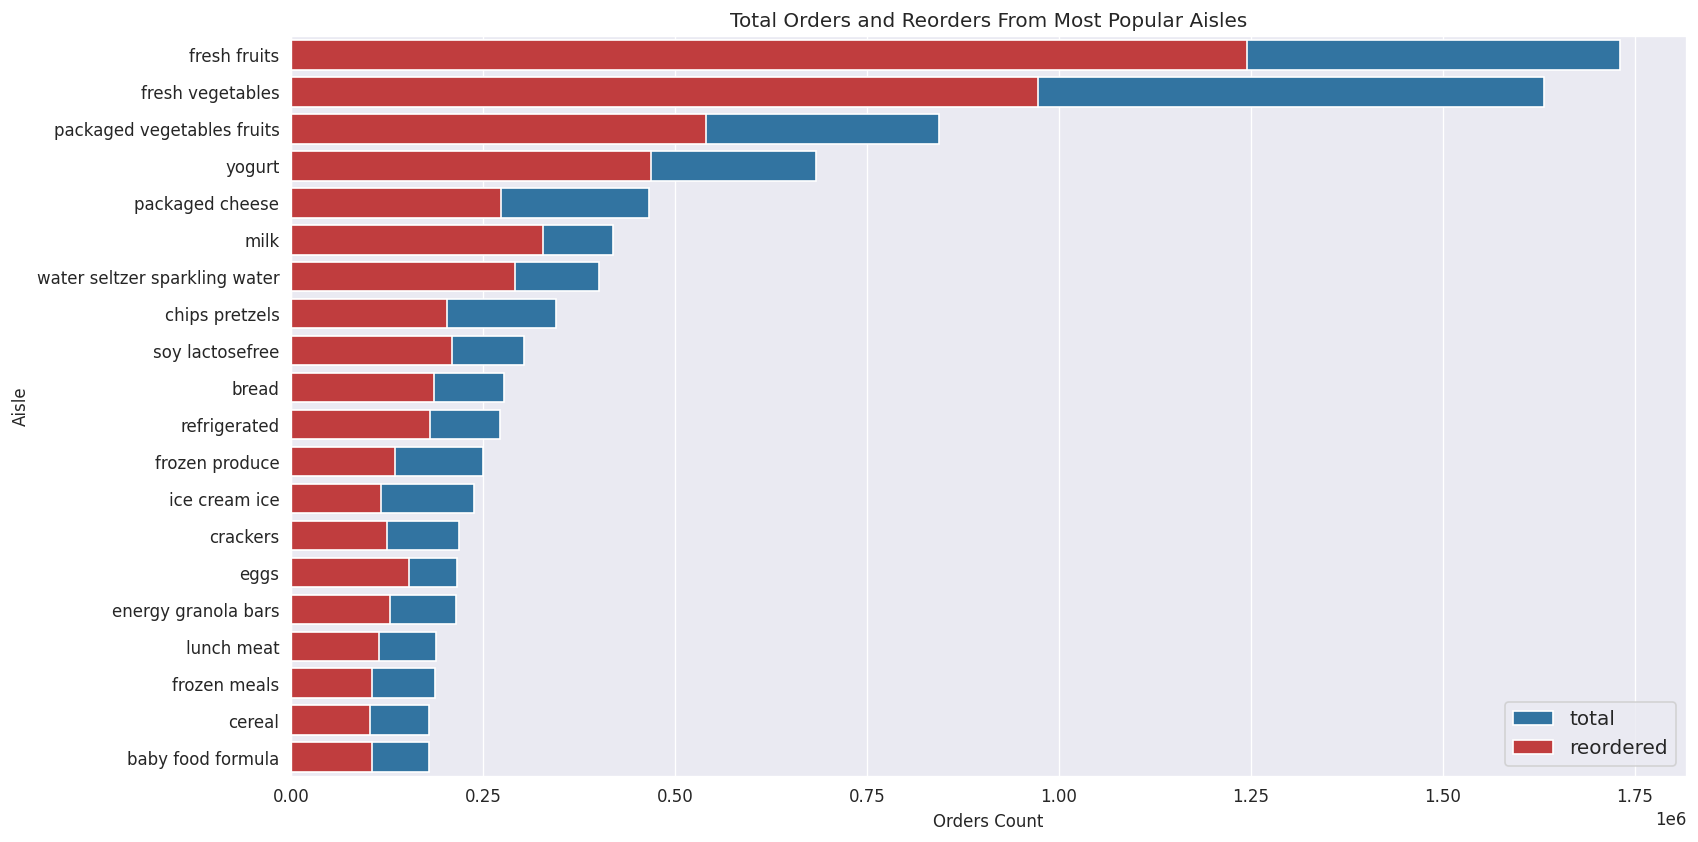

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()


In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

20 Aisles with Highest Reorder Ratio


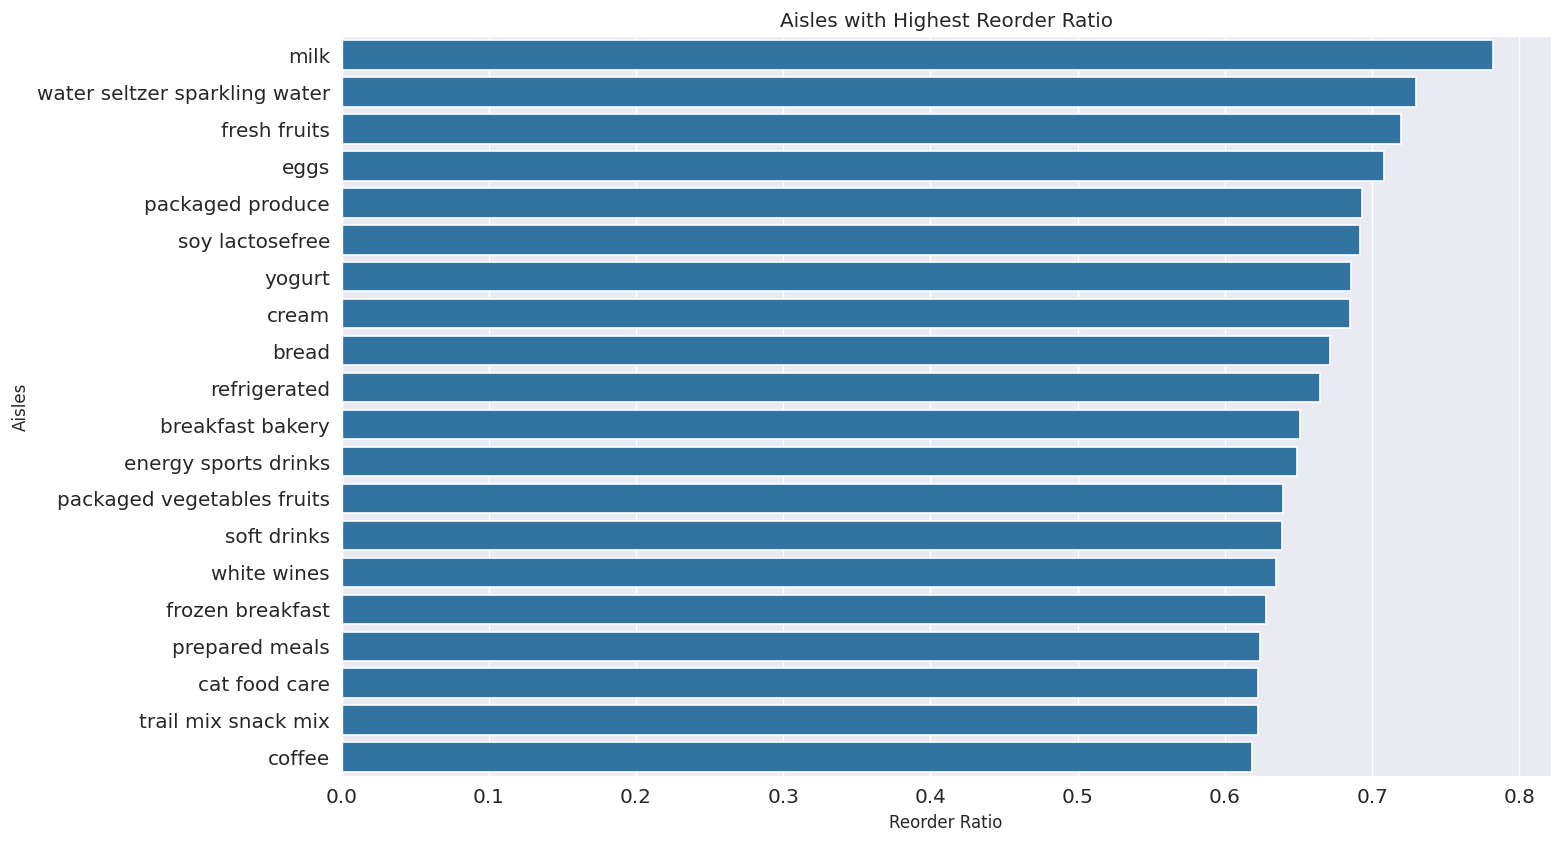

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

20 Aisles with Lowest Reorder Ratio


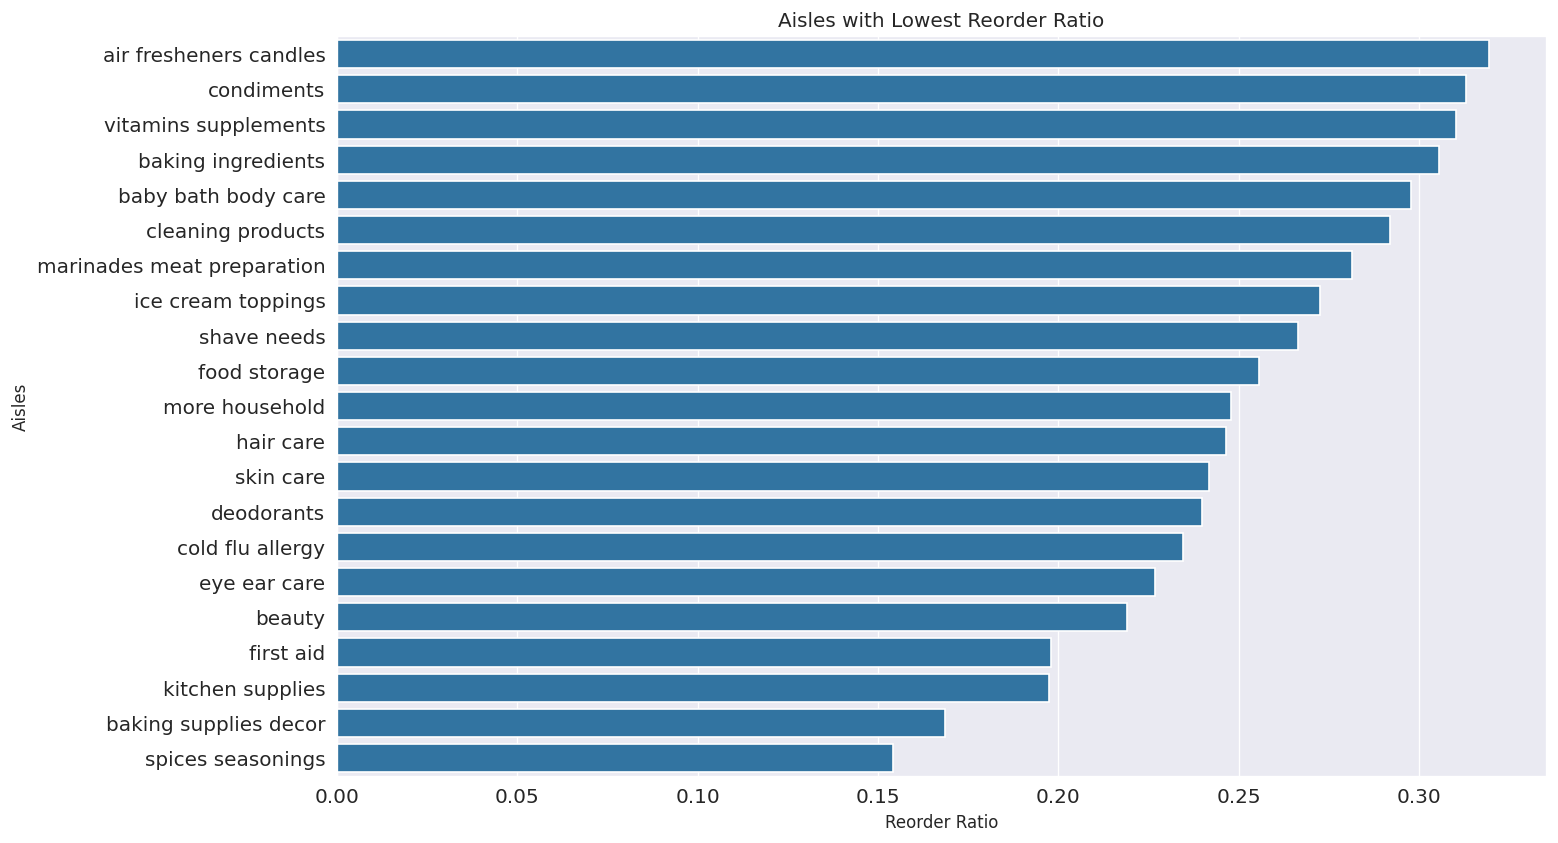

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

Departments

In [ ]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

Total Orders and Reorders From Departments


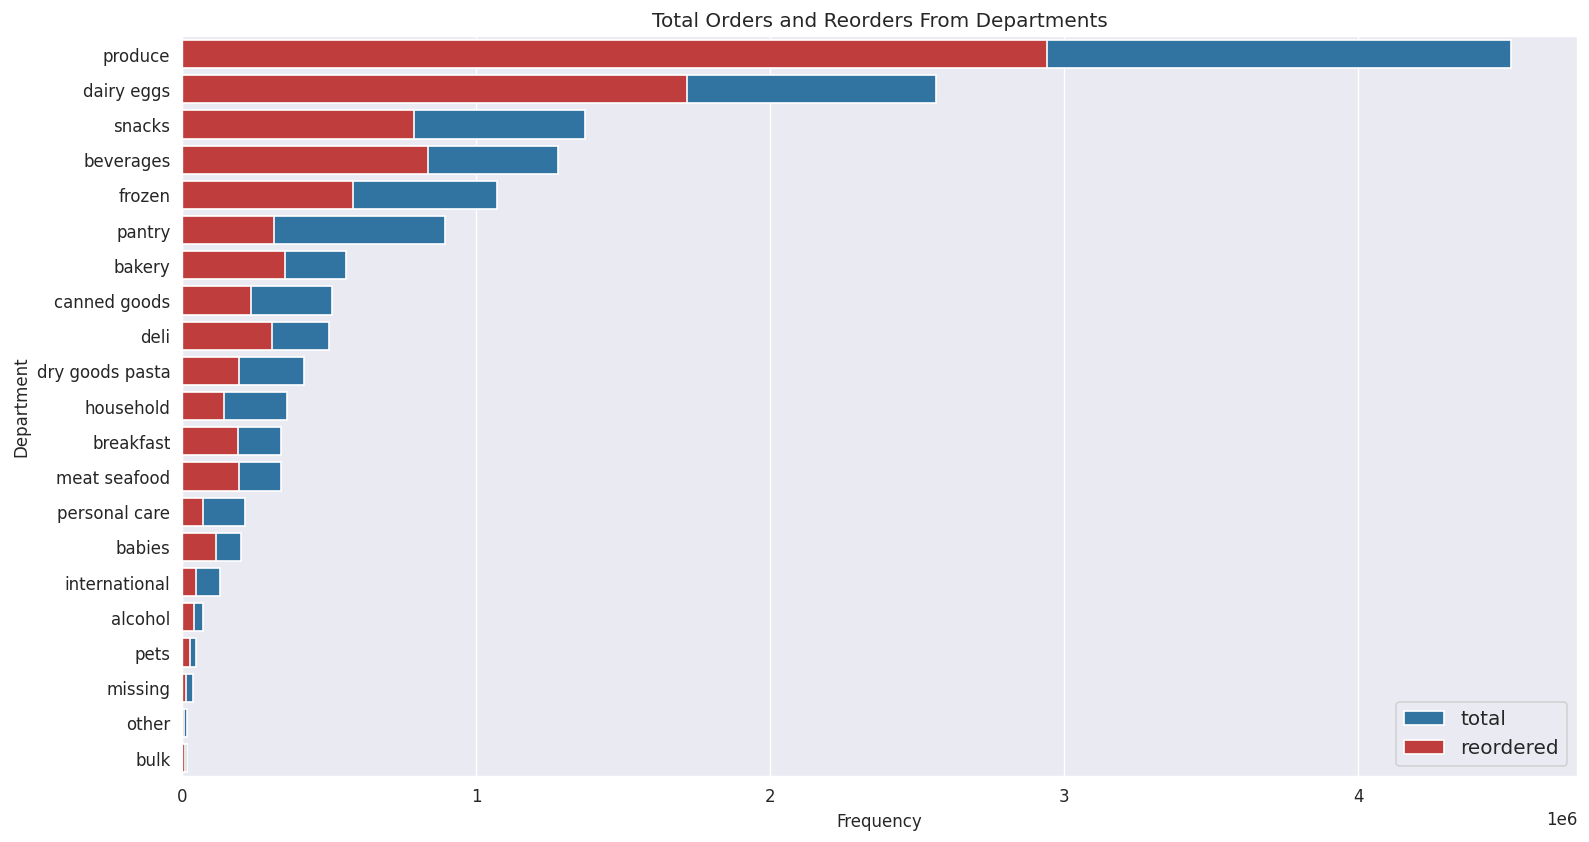

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

Departments with Highest Reorder Ratio


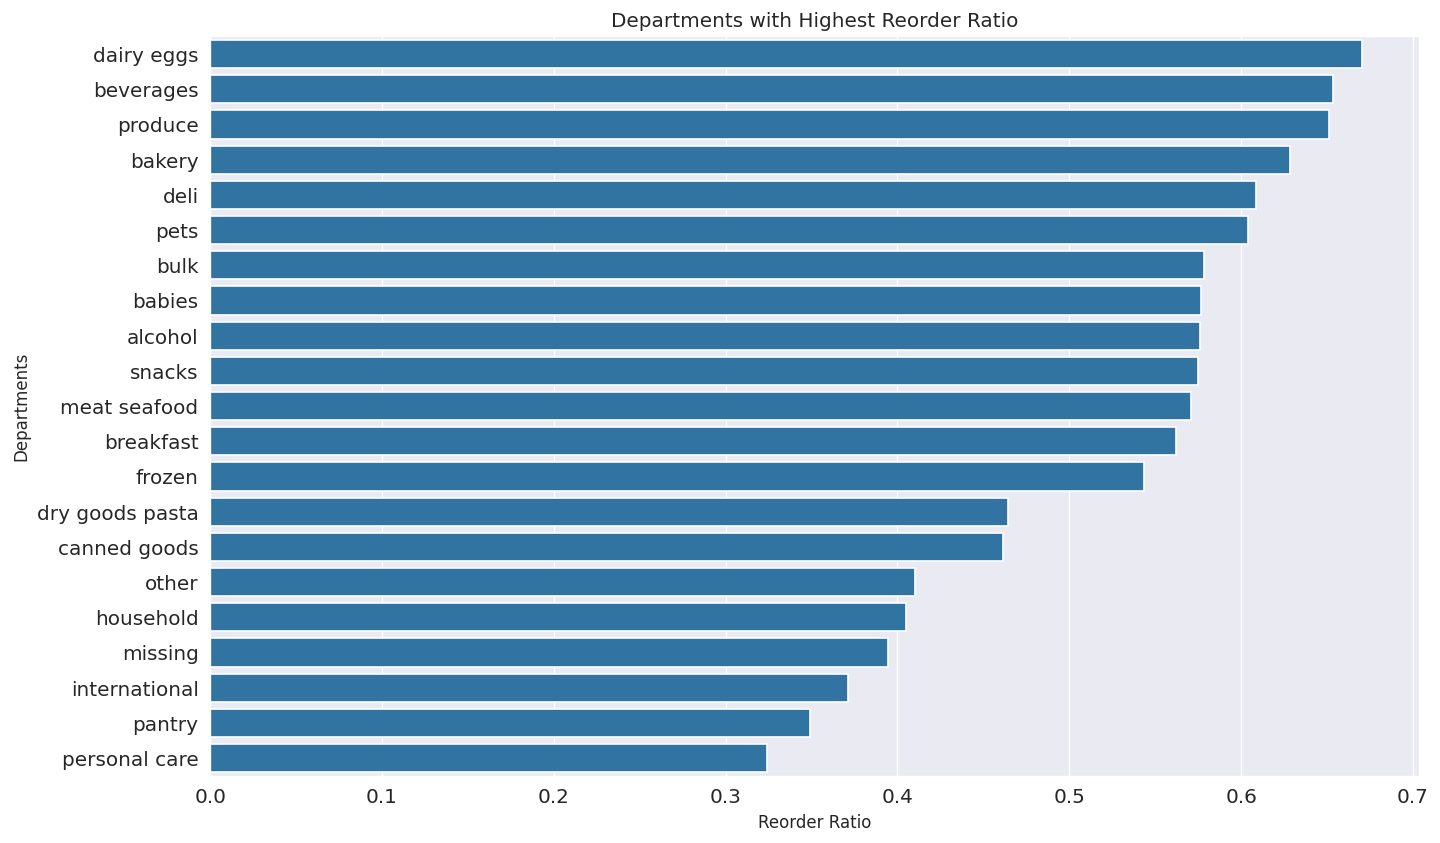

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[0])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

Products

In [ ]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

Most Popular Products


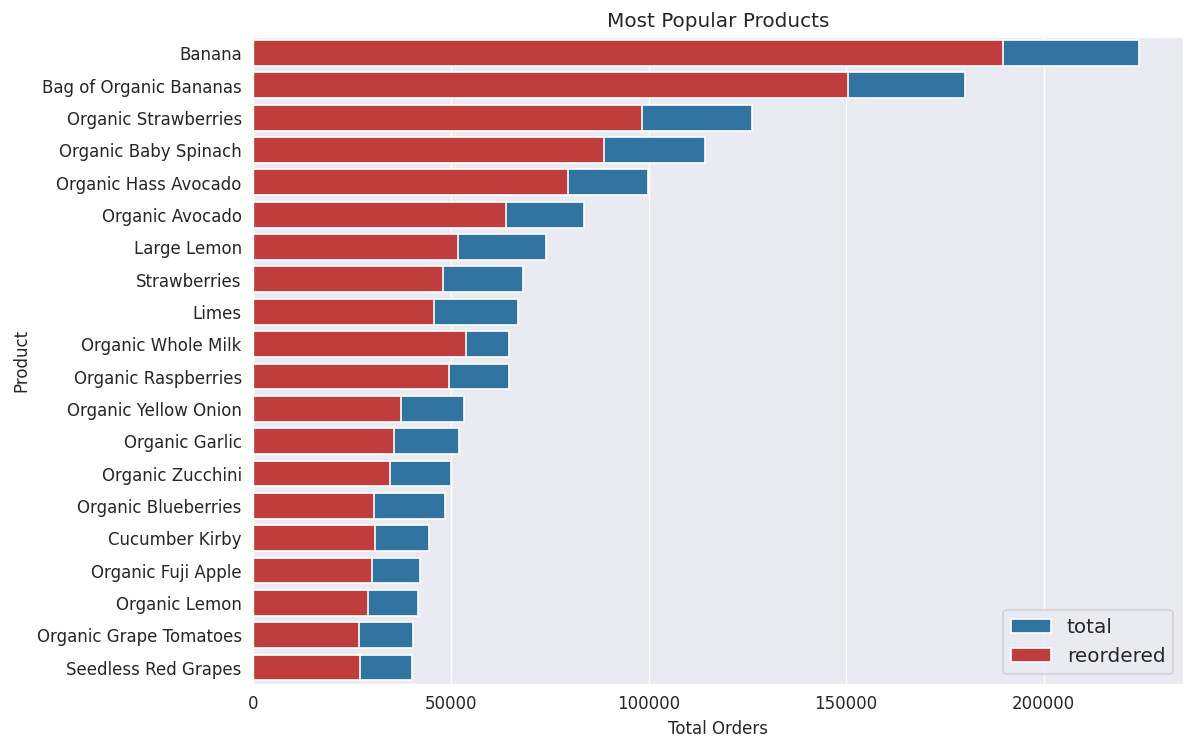

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
49296,Original Veal Cooking Stock,1,1.0,1.0
49245,Chocolates Kisses,1,1.0,1.0
49328,Small Round Cheese Ravioli,1,1.0,1.0
49301,Kissed Caramel Flavored Vodka,1,1.0,1.0
40339,"Wet & Dry Hair Tangle Tamer, Sweet Pear",6,6.0,1.0
40087,Dark Chocolate Fudge Stripe,6,6.0,1.0
39766,Blanc de Noirs,6,6.0,1.0
49145,Refried Beans With Spicy Chipotle,1,1.0,1.0
49126,India Pale Ale Beer,1,1.0,1.0
49125,Imported Petits Toasts Whole Wheat,1,1.0,1.0


Product Users

In [ ]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3638,Banana,61434
3436,Bag of Organic Bananas,51888
31680,Organic Strawberries,45898
28612,Organic Baby Spinach,42585
22244,Large Lemon,34558
30063,Organic Hass Avocado,33923
23243,Limes,32287
28576,Organic Avocado,32256
42599,Strawberries,31198
28778,Organic Blueberries,26149


In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)


,product_name,total_users,total,reorders,reorder_ratio
23979,Magnesium Citrate Cherry,2,5,5.0,1.0
2507,Appetizers for Cats Steamed Wild Alaskan Salmon,1,1,1.0,1.0
41244,Sorbet Raspberry,1,1,1.0,1.0
49261,"Zucchini Chips, Sour Cream & Onion",1,1,1.0,1.0
12181,Date & Almond Bite Size Crisps,1,2,2.0,1.0
2651,Apple Sparkling Juice Beverage,1,1,1.0,1.0
27710,"Oatmeal, Thick & Rough",1,3,3.0,1.0
41477,Spanish Peanuts,1,1,1.0,1.0
23985,Magnesium Plus B6,1,2,2.0,1.0
17350,Gluten Free Potato Cracker Thins,1,1,1.0,1.0


Cumulative Sum of Unique Users Per Product

In [ ]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()


,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,61434,224191,189650.0,0.845930,61434
1,Bag of Organic Bananas,51888,180061,150447.0,0.835534,113322
2,Organic Strawberries,45898,126192,98232.0,0.778433,159220
3,Organic Baby Spinach,42585,114244,88846.0,0.777686,201805
4,Large Lemon,34558,74143,51819.0,0.698906,236363


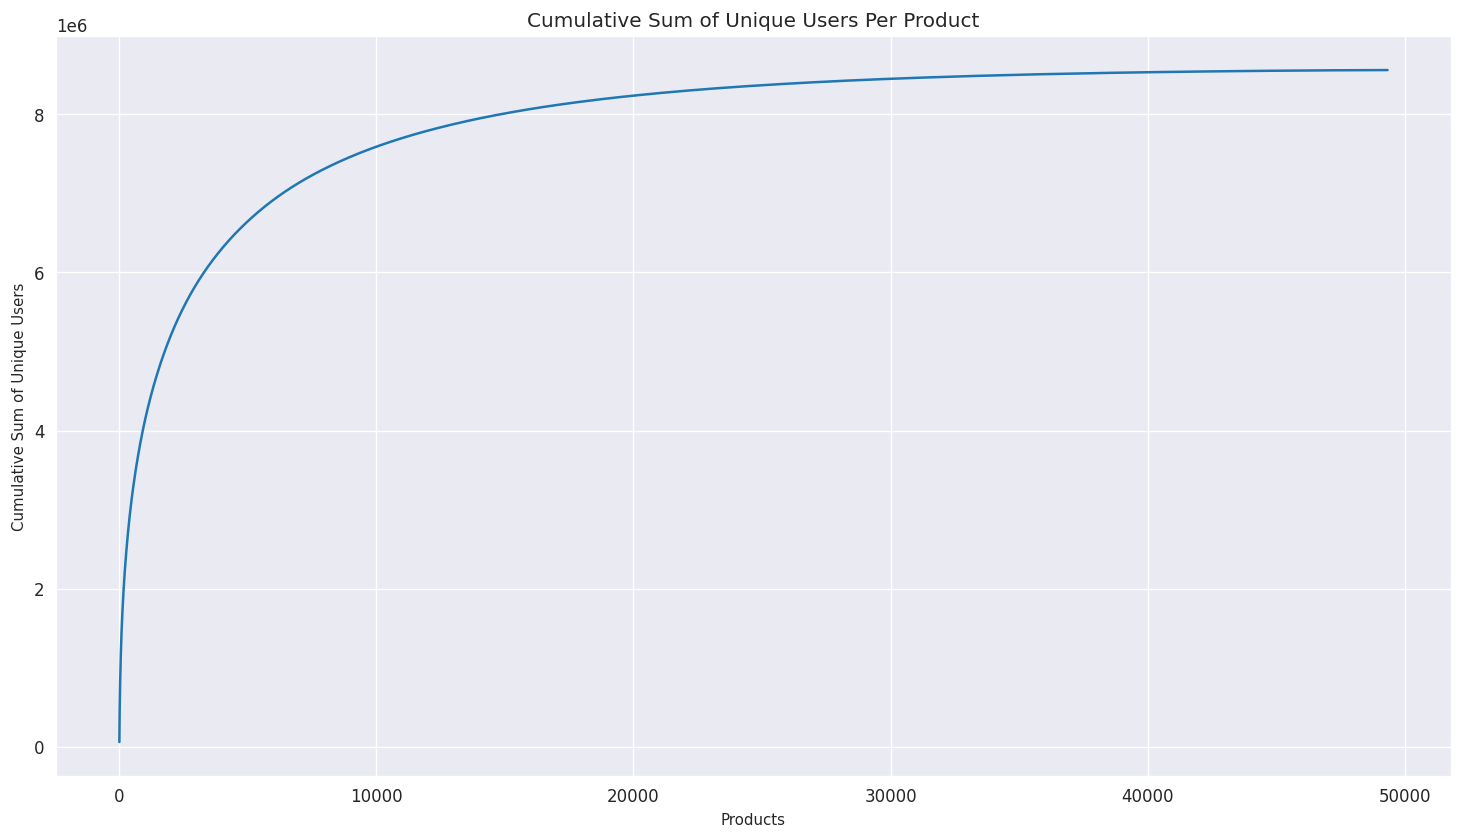

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

Total Product Orders VS Total Unique Product Buyers


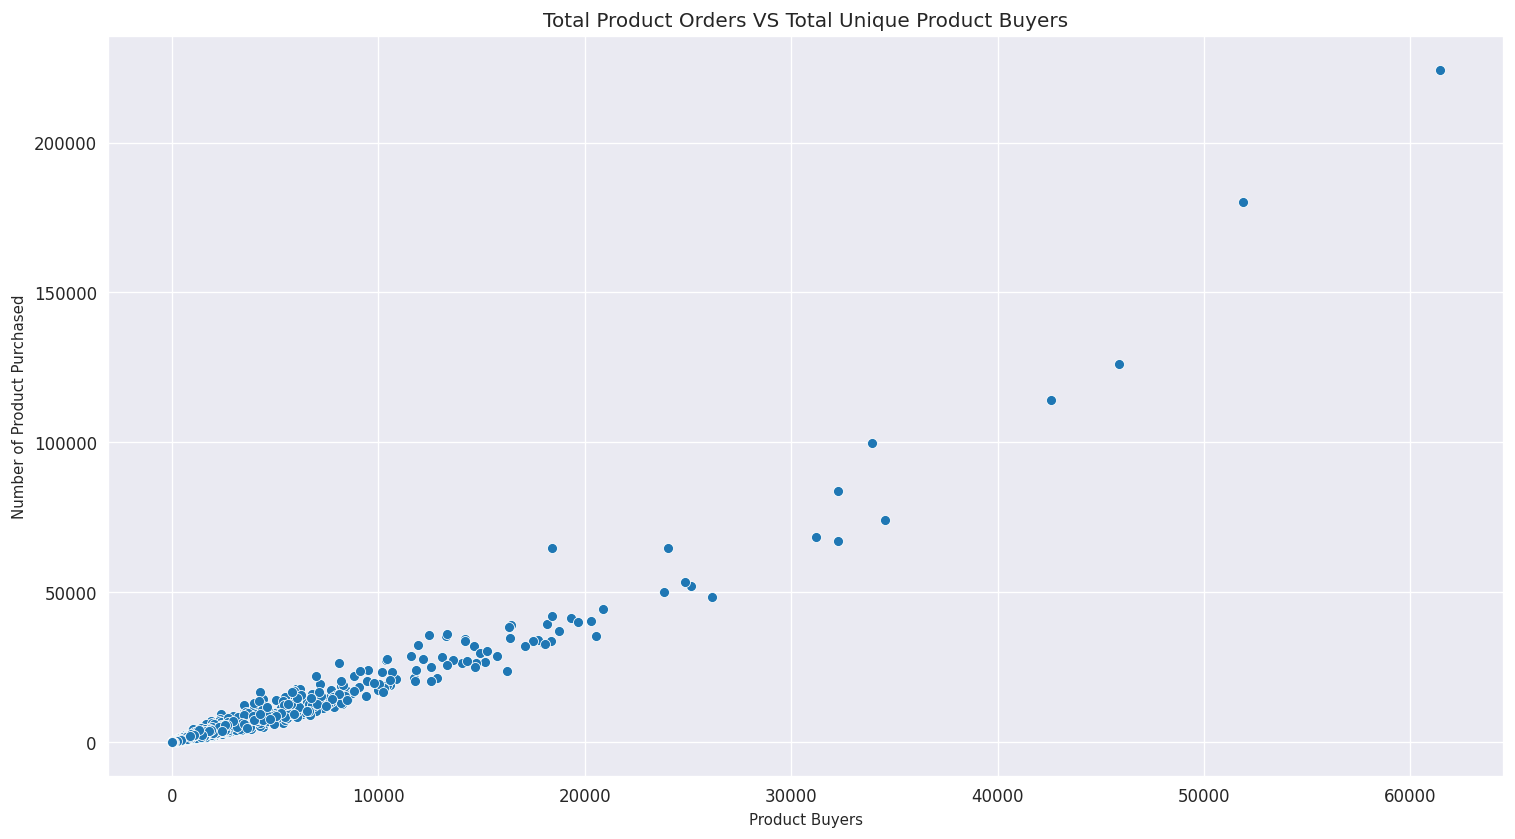

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

Reorder Percentage VS Total Orders


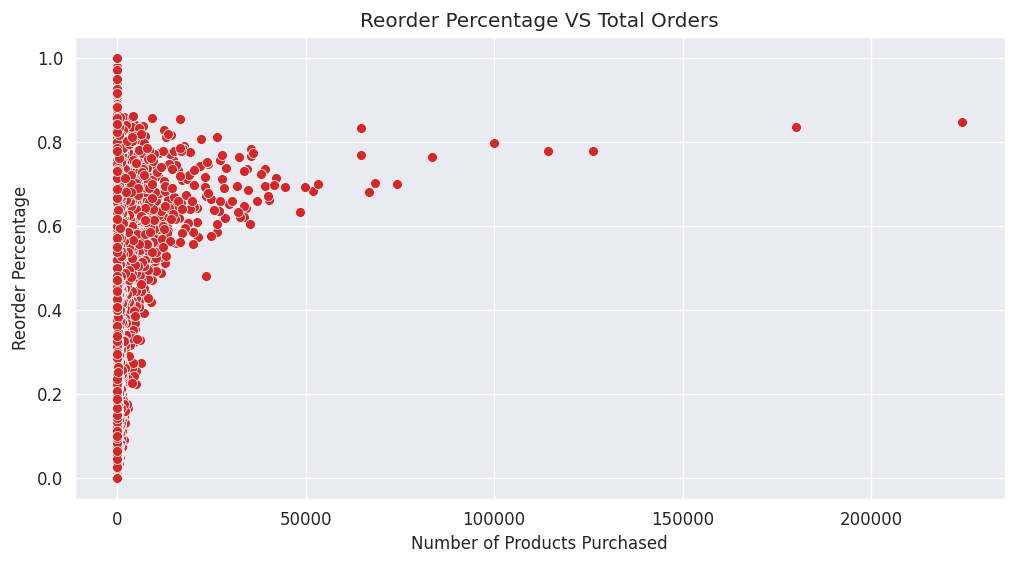

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

Reorder Percentage VS Total Unique Users


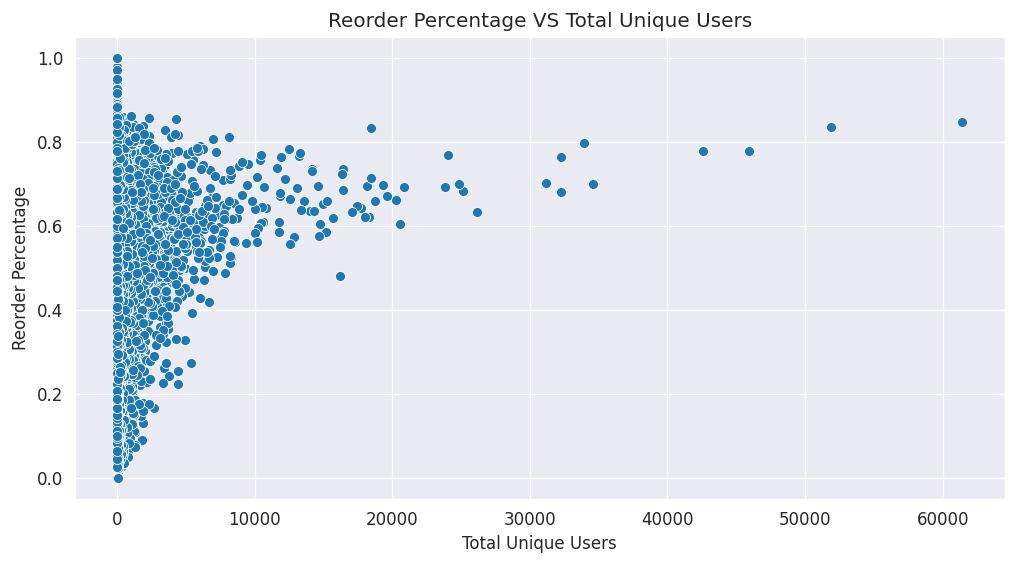

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

Organic Vs Inorganic


In [ ]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,295,352,110.0,0.312500,False
1,#2 Cone White Coffee Filters,10,10,1.0,0.100000,False
2,#2 Mechanical Pencils,4,4,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,83,103,34.0,0.330097,False
4,& Go! Hazelnut Spread + Pretzel Sticks,46,76,37.0,0.486842,False


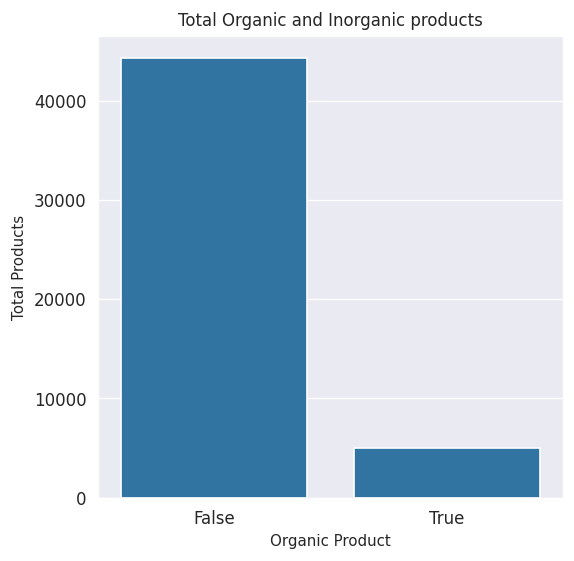

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

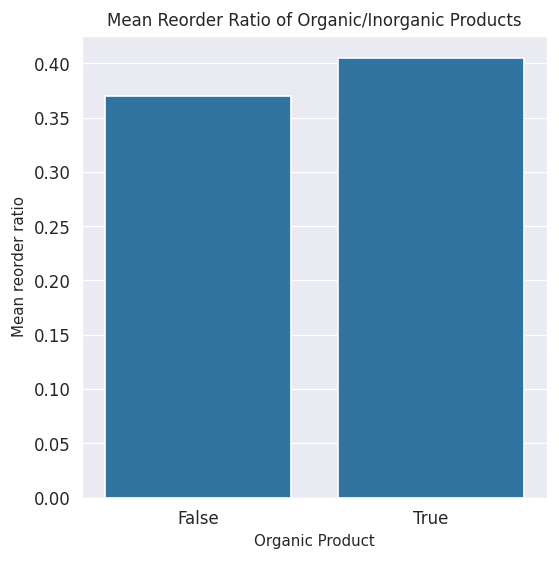

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

Add to Cart Order VS Reorder


In [ ]:
# Check current dtypes
print(order_products.dtypes)

# Convert group key and aggregation target to supported types
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int32')
order_products['reordered'] = order_products['reordered'].astype('float64')

# Group and aggregate
temp_df = order_products.groupby('add_to_cart_order', as_index=False)['reordered'].mean()

# Preview
print(temp_df.head())


order_id                    int32
product_id                float16
add_to_cart_order         float16
reordered                 float32
product_name               object
aisle_id                  float16
department_id             float16
aisle                      object
department                 object
user_id                     int32
eval_set                   object
order_number                 int8
order_dow                    int8
order_hour_of_day            int8
days_since_prior_order    float16
dtype: object


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

AttributeError: 'DataFrame' object has no attribute 'add_to_cart_order'

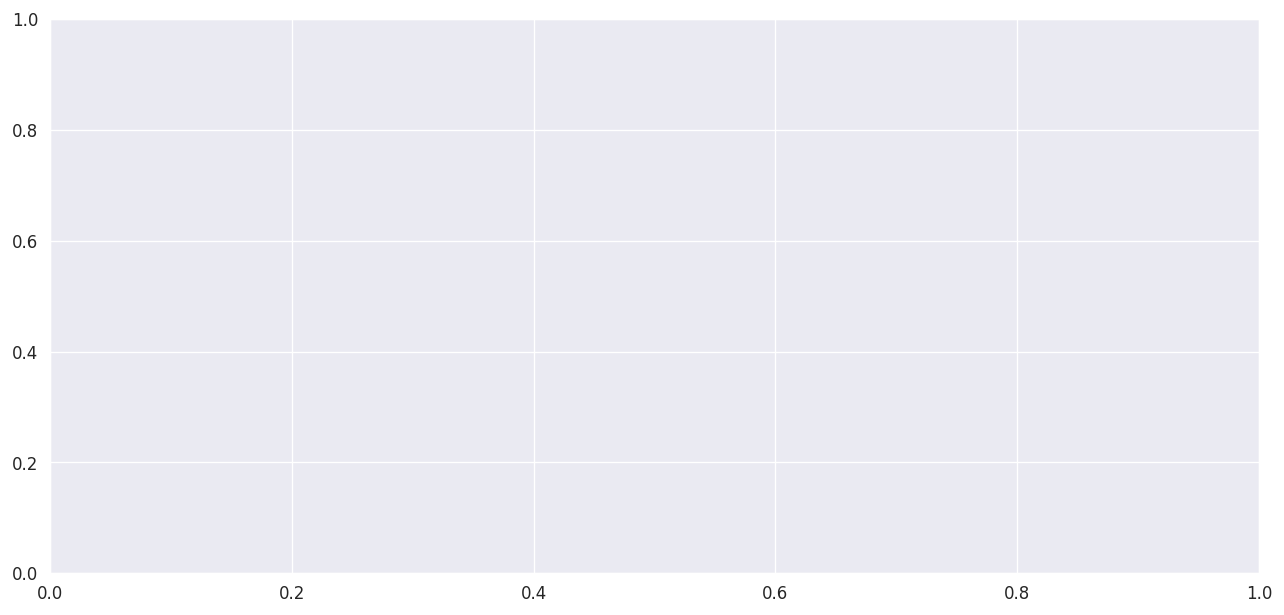

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

Most Popular Products on different days


In [ ]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

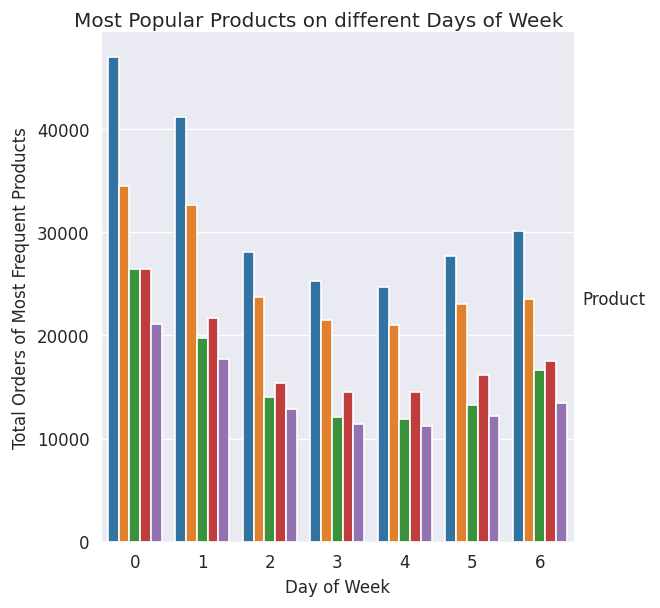

In [ ]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")